<a href="https://colab.research.google.com/github/hun9008/ML_TeamProject_24SS/blob/main/VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/ML_TeamProject/

/content/drive/MyDrive/ML_TeamProject


In [3]:
ls

data/             images_png/                                        VGG.ipynb
images_gray_jpg/  preprocessed_images_40/                            무_train_labeled_2000/
images_gray_png/  PreTest.ipynb
images_jpg/       vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5


In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
import os
os.chdir("/content/drive/My Drive/ML_TeamProject/images_jpg")
image_path = "/content/drive/My Drive/ML_TeamProject/images_jpg"
!ls

incipient  mature  no  overripe  TEST  TRAIN  VAL


In [6]:
ls

incipient/  mature/  no/  overripe/  TEST/  TRAIN/  VAL/


In [7]:
import pickle
os.chdir(os.path.join(image_path, 'overripe'))
!ls
with open('zero_centering.pkl', 'rb') as f:
     overripe = pickle.load(f)

crop_D0_0d4dc616-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_0dbc6acf-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_0dbe50e6-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_0dc21b40-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_0dfca5a1-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_0e6c62a2-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_0eff81e3-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_0fff3ee3-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_1009962b-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_104f663b-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_10586ad3-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_106497c3-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_10659aba-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_106b35f4-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_10e29be9-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_1105ea20-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_1121c6b8-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_1121fbd0-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_112fa67a-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_1131e6a5-60a5-11ec-8402-0a7404972c70.jpg
crop_D0_11321a91-60a

In [8]:
print(len(overripe))

2000


In [9]:
os.chdir(os.path.join(image_path, 'no'))
with open('zero_centering.pkl', 'rb') as f:
     no = pickle.load(f)
     print('no : ', len(no))

os.chdir(os.path.join(image_path, 'mature'))
with open('zero_centering.pkl', 'rb') as f:
     mature = pickle.load(f)
     print('mature : ', len(mature))

os.chdir(os.path.join(image_path, 'incipient'))
with open('zero_centering.pkl', 'rb') as f:
     incipient = pickle.load(f)
     print('incipient : ', len(incipient))

no :  2000
mature :  2000
incipient :  2000


In [10]:
import pandas as pd
df_overripe = pd.DataFrame.from_dict(overripe)

In [11]:
print(overripe.get('crop_D0_0d4dc616-60a5-11ec-8402-0a7404972c70.jpg'))

{'stage': 'overripe', 'zero_centering': array([[[-0.33952813, -0.33952813, -0.33952813],
        [-0.33952813, -0.33952813, -0.33952813],
        [-0.33952813, -0.33952813, -0.33952813],
        ...,
        [-0.3434497 , -0.3434497 , -0.3434497 ],
        [-0.3434497 , -0.3434497 , -0.3434497 ],
        [-0.3434497 , -0.3434497 , -0.3434497 ]],

       [[-0.33952813, -0.33952813, -0.33952813],
        [-0.33952813, -0.33952813, -0.33952813],
        [-0.33952813, -0.33952813, -0.33952813],
        ...,
        [-0.3434497 , -0.3434497 , -0.3434497 ],
        [-0.3434497 , -0.3434497 , -0.3434497 ],
        [-0.3434497 , -0.3434497 , -0.3434497 ]],

       [[-0.33952813, -0.33952813, -0.33952813],
        [-0.33952813, -0.33952813, -0.33952813],
        [-0.33952813, -0.33952813, -0.33952813],
        ...,
        [-0.3434497 , -0.3434497 , -0.3434497 ],
        [-0.3434497 , -0.3434497 , -0.3434497 ],
        [-0.3434497 , -0.3434497 , -0.3434497 ]],

       ...,

       [[-0.31992029

In [12]:
import numpy as np

# overripe의 모든 사진에 대해 반복
overripe_data_list = []

for filename, data in overripe.items():
    zero_centering_value = data.get('zero_centering')
    overripe_data_list.append(np.array(zero_centering_value))

# 리스트를 NumPy 배열로 변환
overripe_data = np.array(overripe_data_list)

# 확인을 위해 배열의 크기 출력
print("overripe_data shape:", overripe_data.shape)

overripe_data shape: (2000, 224, 224, 3)


In [13]:
no_data_list = []

for filename, data in no.items():
    zero_centering_value = data.get('zero_centering')
    no_data_list.append(np.array(zero_centering_value))

# 리스트를 NumPy 배열로 변환
no_data = np.array(no_data_list)

# 확인을 위해 배열의 크기 출력
print("no_data shape:", no_data.shape)

mature_data_list = []

for filename, data in mature.items():
    zero_centering_value = data.get('zero_centering')
    mature_data_list.append(np.array(zero_centering_value))

# 리스트를 NumPy 배열로 변환
mature_data = np.array(mature_data_list)

# 확인을 위해 배열의 크기 출력
print("mature_data shape:", mature_data.shape)

incipient_data_list = []

for filename, data in incipient.items():
    zero_centering_value = data.get('zero_centering')
    incipient_data_list.append(np.array(zero_centering_value))

# 리스트를 NumPy 배열로 변환
incipient_data = np.array(incipient_data_list)

# 확인을 위해 배열의 크기 출력
print("incipient_data shape:", incipient_data.shape)

no_data shape: (2000, 224, 224, 3)
mature_data shape: (2000, 224, 224, 3)
incipient_data shape: (2000, 224, 224, 3)


In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# 데이터를 train/validation/test로 나누기
X = np.concatenate((overripe_data, no_data, mature_data, incipient_data), axis=0)
y = np.concatenate((np.zeros(overripe_data.shape[0]), np.ones(no_data.shape[0]),
                    2*np.ones(mature_data.shape[0]), 3*np.ones(incipient_data.shape[0])))

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [15]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(5600, 224, 224, 3)
(1200, 224, 224, 3)
(1200, 224, 224, 3)


In [16]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)
y_test_one_hot = to_categorical(y_test)


# CNN test

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# 모델 구성
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(4, activation='softmax')  # 4개의 클래스에 대한 출력
])


# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot), batch_size=32, epochs=10)

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print('Test accuracy:', test_acc)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                

# VGG16

In [31]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for classification
model = Sequential([
    base_model,
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile model
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tuning: Unfreeze some layers and train the entire model with new data
for layer in model.layers:
    if 'block5' in layer.name:  # Unfreeze layers starting from 'block5'
        layer.trainable = True

# Train the model with new data

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot), batch_size=32, epochs=10)

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print('Test accuracy:', test_acc)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_14 (Dense)            (None, 4096)              102764544 
                                                                 
 dense_15 (Dense)            (None, 4096)              16781312  
                                                                 
 dense_16 (Dense)            (None, 4)                 16388     
                                                                 
Total params: 134276932 (512.23 MB)
Trainable params: 119562244 (456.09 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Ep

In [33]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.5 MB/s eta 0:00:00


# Hyperparameter Tuning

Best parameters: {'lr': 0.0008350971415864953, 'batch_size': 32}

In [17]:
del overripe, no, mature, incipient


In [18]:
del df_overripe
del overripe_data, no_data, mature_data, incipient_data
del overripe_data_list, no_data_list, mature_data_list, incipient_data_list

In [19]:
del y_train, y_val, y_test

In [20]:
del X, y

In [23]:
import optuna
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

def objective(trial, X_train, y_train, X_val, y_val):
    # Define parameters to be tuned
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-3)  # Learning rate
    epochs = 10
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64])  # Batch size

    # Load pre-trained VGG16 model without top layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom top layers for classification
    model = Sequential([
        base_model,
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(4, activation='softmax')  # Assuming 4 classes for classification
    ])

    # Compile model
    optimizer = Adam(lr=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

    # Evaluate the model
    val_loss = history.history['val_loss'][-1]
    return val_loss


In [24]:
# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, X_train, y_train_one_hot, X_val, y_val_one_hot), n_trials=5)

# Get the best parameters
best_params = study.best_params
print("Best parameters:", best_params)

[I 2024-05-07 10:13:10,702] A new study created in memory with name: no-name-dffa88ee-ca17-45d4-8ce0-87badbbeddaa
<ipython-input-23-34789c22e97f>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-3)  # Learning rate


Epoch 1/10
175/175 [==============================] - 12s 45ms/step - loss: 1.6249 - accuracy: 0.5537 - val_loss: 0.8449 - val_accuracy: 0.6017
Epoch 2/10
175/175 [==============================] - 6s 34ms/step - loss: 0.7215 - accuracy: 0.6595 - val_loss: 0.8367 - val_accuracy: 0.6167
Epoch 3/10
175/175 [==============================] - 6s 34ms/step - loss: 0.6078 - accuracy: 0.7300 - val_loss: 0.8613 - val_accuracy: 0.6033
Epoch 4/10
175/175 [==============================] - 6s 34ms/step - loss: 0.4828 - accuracy: 0.8018 - val_loss: 0.7686 - val_accuracy: 0.6500
Epoch 5/10
175/175 [==============================] - 6s 34ms/step - loss: 0.3863 - accuracy: 0.8395 - val_loss: 0.8244 - val_accuracy: 0.6883
Epoch 6/10
175/175 [==============================] - 6s 34ms/step - loss: 0.3485 - accuracy: 0.8573 - val_loss: 0.8555 - val_accuracy: 0.6900
Epoch 7/10
175/175 [==============================] - 6s 34ms/step - loss: 0.2749 - accuracy: 0.8911 - val_loss: 1.1081 - val_accuracy: 0.640

[I 2024-05-07 10:14:22,003] Trial 0 finished with value: 1.1436809301376343 and parameters: {'lr': 0.0008350971415864953, 'batch_size': 32}. Best is trial 0 with value: 1.1436809301376343.


Epoch 1/10
175/175 [==============================] - 9s 40ms/step - loss: 1.7620 - accuracy: 0.5411 - val_loss: 0.8654 - val_accuracy: 0.5625
Epoch 2/10
175/175 [==============================] - 6s 34ms/step - loss: 0.7441 - accuracy: 0.6436 - val_loss: 0.8224 - val_accuracy: 0.5908
Epoch 3/10
175/175 [==============================] - 6s 34ms/step - loss: 0.6025 - accuracy: 0.7248 - val_loss: 0.8252 - val_accuracy: 0.6342
Epoch 4/10
175/175 [==============================] - 6s 34ms/step - loss: 0.5181 - accuracy: 0.7729 - val_loss: 0.8331 - val_accuracy: 0.6342
Epoch 5/10
175/175 [==============================] - 6s 34ms/step - loss: 0.4307 - accuracy: 0.8166 - val_loss: 0.8370 - val_accuracy: 0.6300
Epoch 6/10
175/175 [==============================] - 6s 33ms/step - loss: 0.3252 - accuracy: 0.8696 - val_loss: 1.0395 - val_accuracy: 0.6208
Epoch 7/10
175/175 [==============================] - 6s 33ms/step - loss: 0.2731 - accuracy: 0.8898 - val_loss: 1.0500 - val_accuracy: 0.6483

[I 2024-05-07 10:15:29,573] Trial 1 finished with value: 1.2789663076400757 and parameters: {'lr': 5.8262408282292054e-05, 'batch_size': 32}. Best is trial 0 with value: 1.1436809301376343.


Epoch 1/10
350/350 [==============================] - 10s 24ms/step - loss: 1.4085 - accuracy: 0.5352 - val_loss: 0.8556 - val_accuracy: 0.5300
Epoch 2/10
350/350 [==============================] - 7s 21ms/step - loss: 0.7431 - accuracy: 0.6434 - val_loss: 0.9177 - val_accuracy: 0.5908
Epoch 3/10
350/350 [==============================] - 7s 21ms/step - loss: 0.6213 - accuracy: 0.7193 - val_loss: 0.7719 - val_accuracy: 0.6417
Epoch 4/10
350/350 [==============================] - 7s 21ms/step - loss: 0.5206 - accuracy: 0.7825 - val_loss: 0.7582 - val_accuracy: 0.6633
Epoch 5/10
350/350 [==============================] - 7s 21ms/step - loss: 0.4397 - accuracy: 0.8170 - val_loss: 0.8469 - val_accuracy: 0.6783
Epoch 6/10
350/350 [==============================] - 7s 21ms/step - loss: 0.3775 - accuracy: 0.8473 - val_loss: 0.8731 - val_accuracy: 0.6708
Epoch 7/10
350/350 [==============================] - 7s 21ms/step - loss: 0.2828 - accuracy: 0.8909 - val_loss: 0.8856 - val_accuracy: 0.642

[I 2024-05-07 10:16:51,544] Trial 2 finished with value: 1.2394543886184692 and parameters: {'lr': 0.0001731208456871831, 'batch_size': 16}. Best is trial 0 with value: 1.1436809301376343.


Epoch 1/10
350/350 [==============================] - 10s 24ms/step - loss: 1.3738 - accuracy: 0.5429 - val_loss: 0.8670 - val_accuracy: 0.5750
Epoch 2/10
350/350 [==============================] - 8s 21ms/step - loss: 0.7205 - accuracy: 0.6555 - val_loss: 0.7567 - val_accuracy: 0.6150
Epoch 3/10
350/350 [==============================] - 7s 21ms/step - loss: 0.6060 - accuracy: 0.7245 - val_loss: 0.8138 - val_accuracy: 0.6217
Epoch 4/10
350/350 [==============================] - 7s 21ms/step - loss: 0.5411 - accuracy: 0.7645 - val_loss: 0.8890 - val_accuracy: 0.6283
Epoch 5/10
350/350 [==============================] - 7s 21ms/step - loss: 0.4470 - accuracy: 0.8116 - val_loss: 1.3419 - val_accuracy: 0.5708
Epoch 6/10
350/350 [==============================] - 7s 21ms/step - loss: 0.3663 - accuracy: 0.8518 - val_loss: 0.8622 - val_accuracy: 0.6717
Epoch 7/10
350/350 [==============================] - 7s 21ms/step - loss: 0.3264 - accuracy: 0.8711 - val_loss: 0.9569 - val_accuracy: 0.684

[I 2024-05-07 10:18:15,440] Trial 3 finished with value: 1.2861474752426147 and parameters: {'lr': 0.00010522442182775813, 'batch_size': 16}. Best is trial 0 with value: 1.1436809301376343.


Epoch 1/10
350/350 [==============================] - 10s 25ms/step - loss: 1.5116 - accuracy: 0.5459 - val_loss: 0.8116 - val_accuracy: 0.5700
Epoch 2/10
350/350 [==============================] - 7s 21ms/step - loss: 0.7450 - accuracy: 0.6380 - val_loss: 0.7853 - val_accuracy: 0.6242
Epoch 3/10
350/350 [==============================] - 7s 21ms/step - loss: 0.6436 - accuracy: 0.7084 - val_loss: 0.9404 - val_accuracy: 0.5967
Epoch 4/10
350/350 [==============================] - 7s 21ms/step - loss: 0.5713 - accuracy: 0.7446 - val_loss: 0.8169 - val_accuracy: 0.6283
Epoch 5/10
350/350 [==============================] - 7s 21ms/step - loss: 0.5025 - accuracy: 0.7854 - val_loss: 0.7477 - val_accuracy: 0.6725
Epoch 6/10
350/350 [==============================] - 7s 21ms/step - loss: 0.3999 - accuracy: 0.8338 - val_loss: 0.9053 - val_accuracy: 0.6683
Epoch 7/10
350/350 [==============================] - 7s 21ms/step - loss: 0.3504 - accuracy: 0.8552 - val_loss: 0.9598 - val_accuracy: 0.660

[I 2024-05-07 10:19:39,398] Trial 4 finished with value: 1.3993666172027588 and parameters: {'lr': 3.8562471691944457e-05, 'batch_size': 16}. Best is trial 0 with value: 1.1436809301376343.


Best parameters: {'lr': 0.0008350971415864953, 'batch_size': 32}


In [25]:
print(study.best_value)

1.1436809301376343


In [26]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

In [27]:
from optuna.visualization import plot_param_importances
plot_param_importances(study)

In [29]:
fig = optuna.visualization.plot_parallel_coordinate(study, params=["lr", "batch_size"])
fig.show()

Epoch 1/50
175/175 [==============================] - 9s 43ms/step - loss: 1.7262 - accuracy: 0.5380 - val_loss: 0.8728 - val_accuracy: 0.5450
Epoch 2/50
175/175 [==============================] - 6s 35ms/step - loss: 0.7183 - accuracy: 0.6659 - val_loss: 0.7501 - val_accuracy: 0.6242
Epoch 3/50
175/175 [==============================] - 6s 34ms/step - loss: 0.6046 - accuracy: 0.7262 - val_loss: 0.8419 - val_accuracy: 0.6217
Epoch 4/50
175/175 [==============================] - 6s 34ms/step - loss: 0.4972 - accuracy: 0.7896 - val_loss: 0.9138 - val_accuracy: 0.6233
Epoch 5/50
175/175 [==============================] - 6s 34ms/step - loss: 0.4210 - accuracy: 0.8288 - val_loss: 1.0056 - val_accuracy: 0.6183
Epoch 6/50
175/175 [==============================] - 6s 34ms/step - loss: 0.3190 - accuracy: 0.8696 - val_loss: 1.1786 - val_accuracy: 0.6058
Epoch 7/50
175/175 [==============================] - 6s 36ms/step - loss: 0.2837 - accuracy: 0.8891 - val_loss: 0.9677 - val_accuracy: 0.6775

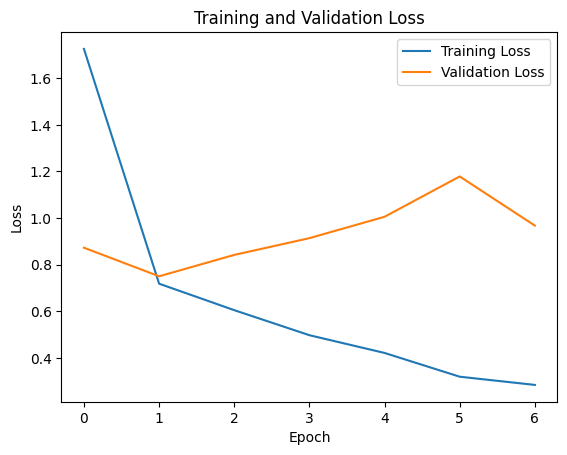

38/38 [==============================] - 1s 24ms/step - loss: 0.7591 - accuracy: 0.6358
Test accuracy: 0.6358333230018616


In [31]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for classification
model = Sequential([
    base_model,
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile model
optimizer = Adam(lr=0.000835)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tuning: Unfreeze some layers and train the entire model with new data
for layer in model.layers:
    if 'block5' in layer.name:  # Unfreeze layers starting from 'block5'
        layer.trainable = True

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train_one_hot, validation_data=(X_val, y_val_one_hot), batch_size=32, epochs=50, callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_one_hot)
print('Test accuracy:', test_acc)
